#### Importing necessary libraries
- pandas -- the library for
- seaborn -- the library for plotting 

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the csv file

In [141]:
df = pd.read_csv("/Users/anna-alexandradanchenko/Documents/University/PF/ICA2/resources/covid-data.csv")

#### Renaming the columns

In [142]:
df.rename({"new_cases": "New cases", "new_deaths": "New deaths",
          "location": "Country"}, axis=1, inplace=True)

In [143]:
df['Month'] = pd.to_datetime(df['date']).dt.to_period('M')

#### Handling missing data
Firstly, we should delete the rows where the "continent" value is missing. In our dataset, if the continent is not determined, the country is not valid (for example: "World", "Asia", etc.)

In [144]:
df = df.dropna(axis=0, subset=['continent'])

We can also delete the rows in column "iso_code" that start with "OWID". They are not valid countries, as they don't have valid iso_code. For example: "Wales", "Scotland", etc.


In [145]:
df = df[~df["iso_code"].astype(str).str.startswith('OWID')]

For some small islands in Oceania we don't have any data. We also don't have any data for such countries as Turkmenistan, North Korea, etc. Let's delete them. It can be done using for cycle. 

In [146]:
locations_todrop = ["Turkmenistan", "Tuvalu", "North Korea", "Niue", "Nauru", "Tonga", "Micronesia", "Marshall Islands",
                    "Anguilla", "Jersey", "Guam", "Guernsey", "United States Virgin Islands", "Sint Maarten (Dutch part)",
                    "Falkland Islands", "Northern Mariana Islands"]
for location in locations_todrop:
    df = df[~df["Country"].astype(str).str.startswith(location)]

#### Optimizing dataset by leaving only necessary columns
Defining variable in which we store columns that we need and then leaving only selected columns. 

In [147]:
to_leave = ["Country", "New cases", "New deaths", "date", "Month", "continent"]
df = df[to_leave]  # Leaving only selected columns.

#### Checking the percentage of missing data in the columns
Firstly, let's determine the number of NaNs in "new cases" and "new deaths" columns.

Then, let's determine the percent of NaNs in both columns

In [148]:
def nans_percent_check():
    nans_cases = df['New cases'].isnull().sum()
    nans_deaths = df['New deaths'].isnull().sum()
    rows_number = len(df.index)
    nans_percent_cases = nans_cases / rows_number * 100
    nans_percent_deaths = nans_deaths / rows_number * 100
    return(print(nans_percent_cases, nans_percent_deaths))
nans_percent_check()

1.2125971354379947 8.909722456412505


Let's plot the sum of Nans grouped by column "New cases" in "New deaths" column. 
We can see

In [149]:
df["nans_deaths"] = df['New deaths'].isnull()
df2 = df.groupby(["New cases"])[["nans_deaths"]].sum()
df2 = df2.reset_index(drop=False)

In [150]:
#df2['Month'] = df2['Month'].astype(str)
#df2['Month'] = pd.to_datetime(df2['Month'])

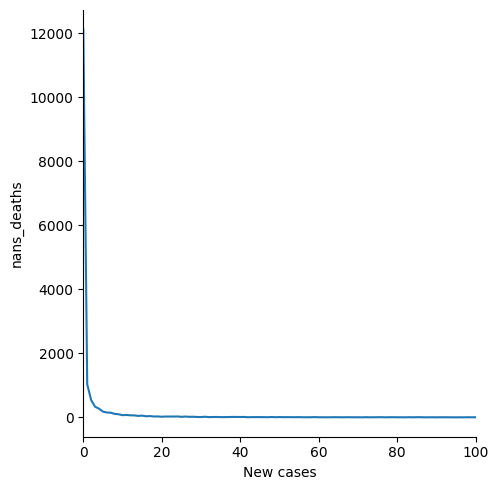

In [175]:
ax = sns.relplot(x = 'New cases', y = 'nans_deaths', kind = 'line', data = df2)
ax.set(xlim=(0, 100))


In [176]:
cases_low = df[df["New cases"] < 10.0]
cases_low["New deaths"] = cases_low["New deaths"].replace(np.nan, 0)

df.update(cases_low)

/var/folders/6p/1jmnvrkx7jxdslfr99shm1z00000gn/T/ipykernel_27702/1692327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_low["New deaths"] = cases_low["New deaths"].replace(np.nan, 0)
/var/folders/6p/1jmnvrkx7jxdslfr99shm1z00000gn/T/ipykernel_27702/1692327.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(cases_low)


In [177]:
nans_percent_check()

1.2125971354379947 1.6929147135197113


Let's remove "nans_deaths" column. We don't need it anymore

In [183]:
df = df.drop("nans_deaths", axis = 1)

#### Converting columns to suitable type

In [184]:
df["date"] = pd.to_datetime(df["date"])
df["Country"] = df["Country"].astype(str)
df["continent"] = df["continent"].astype(str)

Outputting the dataframe information in order to examine datatypes. As you can see, the dtypes of "Country" and "continent" columns are still "object". That is because dtype of string, dict, list is always object. 

In [185]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207571 entries, 0 to 237476
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     207571 non-null  object        
 1   New cases   205054 non-null  float64       
 2   New deaths  204057 non-null  float64       
 3   date        207571 non-null  datetime64[ns]
 4   Month       207571 non-null  period[M]     
 5   continent   207571 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2), period[M](1)
memory usage: 11.1+ MB
None


Now, let's get the 10 random rows to have more global perspective

In [186]:
print(df.sample(10)) 

        Country  New cases  New deaths       date    Month      continent
105766    Italy   101863.0       105.0 2022-07-08  2022-07         Europe
37693    Canada     9466.0        33.0 2022-03-22  2022-03  North America
207413   Taiwan        0.0         0.0 2021-04-08  2021-04           Asia
200885    Spain        0.0         0.0 2022-09-22  2022-09         Europe
207231   Taiwan        1.0         0.0 2020-10-08  2020-10           Asia
24919    Bhutan        0.0         0.0 2022-07-28  2022-07           Asia
170776   Poland      211.0        52.0 2021-06-15  2021-06         Europe
182577    Samoa        0.0         0.0 2022-10-15  2022-10        Oceania
106179  Jamaica       98.0         1.0 2020-12-09  2020-12  North America
75280    France        0.0         0.0 2022-08-13  2022-08         Europe


#### Exporting cleaned data
Exporting tidy dataset into a new file.

In [187]:
df.to_csv("data-cleaned.csv")